In [5]:
#INSTALLING LIBRARIES
!pip install tensorflow

In [41]:
#IMPORTING LIBRARIES
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#CHECKING THE VERION OF TENSORFLOW
print(tf.__version__)

2.14.0


In [54]:
# Importing the dataset
df = pd.read_csv('/content/churn modelling.zip')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


OBSERVATION :
THE FEATURES LIKE "RowNumber" AND "CustomerId" HAS NOTHING TO CONTRIBUTE TO OUR DEPENDENT FEATURE , THEREFORE WE WILL DROP THESE TWO COLUMNS.

In [55]:
#DROPPING UNNECESSARY FEATURES
df = df.drop(columns=["RowNumber","CustomerId","Surname"])
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
#CHECKING FOR NULL VALUES
df.isnull().sum().sum()

0

THERE ARE NO NULL VALUES

In [57]:
#CHECKING FOR DUPLICATE ROWS
df.duplicated().sum()

0

THERE ARE NO DUPLICATE ROWS

In [115]:

#GETTING ALL THE NUMERICAL FEATURES
num_var = df.select_dtypes(include=['int64','float64']).keys()
num_var


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

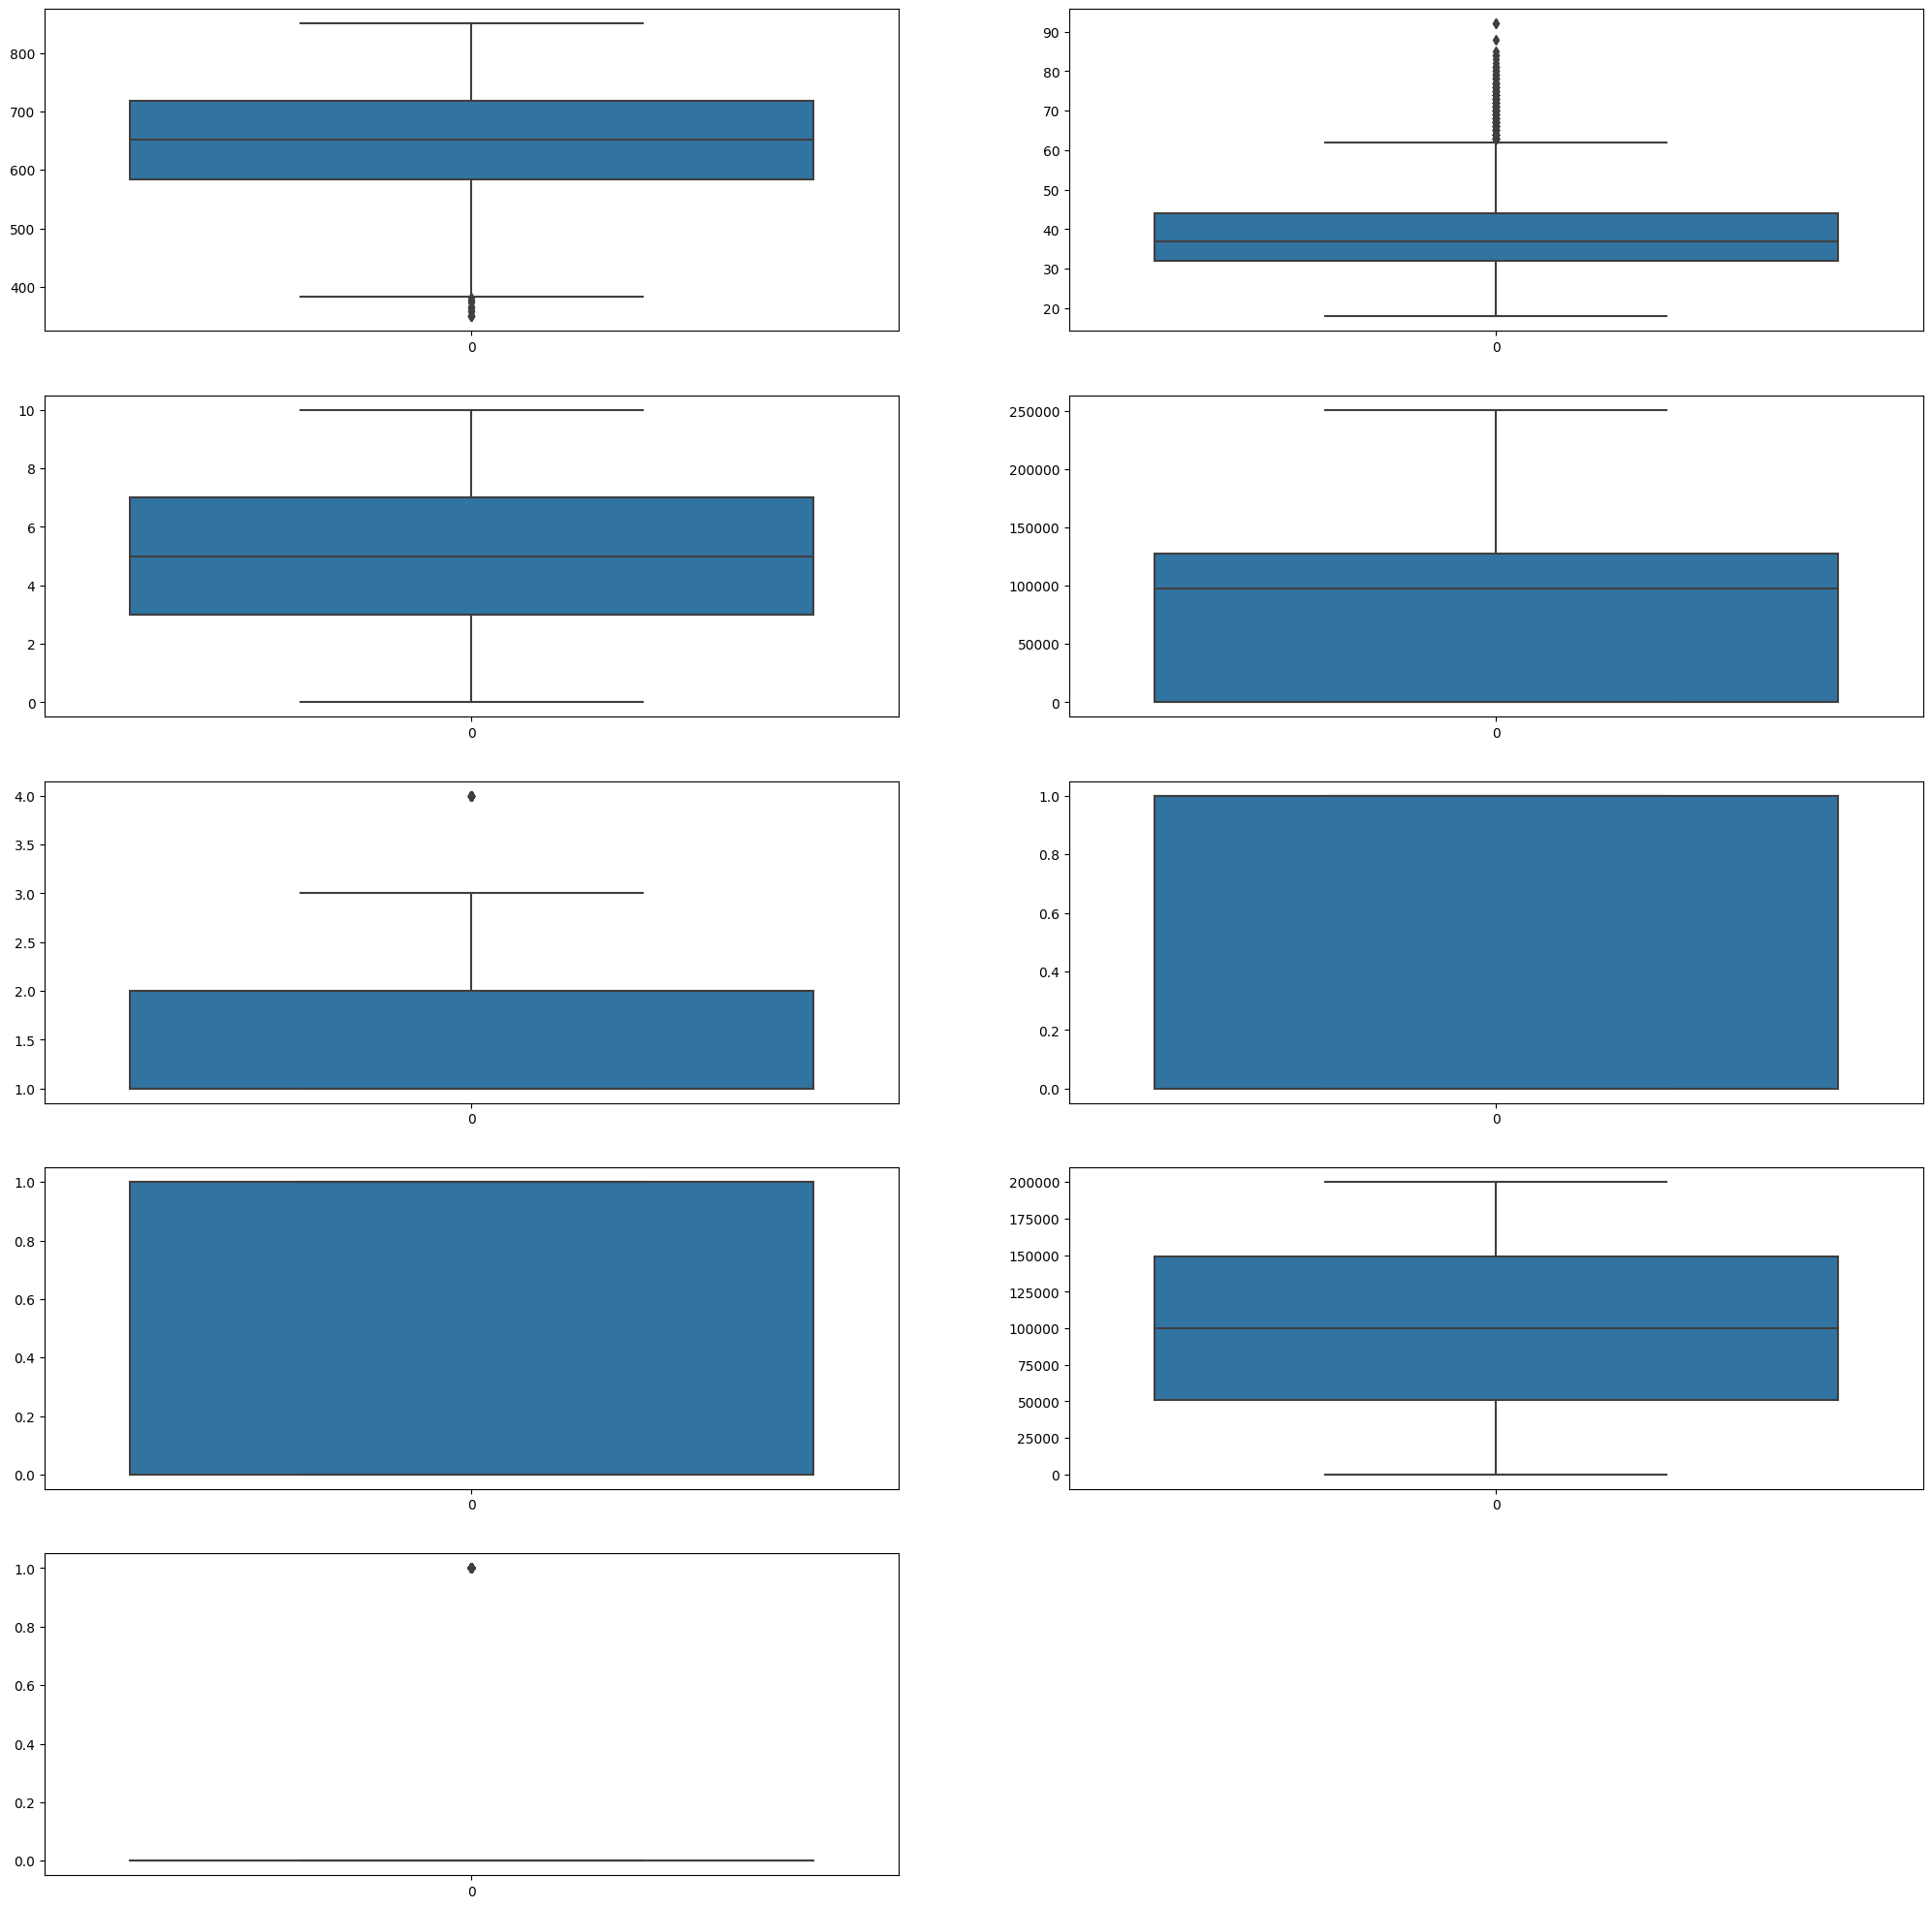

In [116]:
#CHECKING FOR OUTLIERS
plt.figure(figsize=(25,25))
for i , var in enumerate(num_var):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[var])

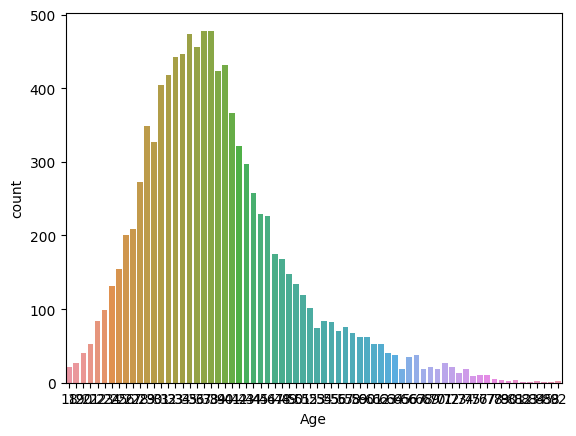

In [117]:
#ANALYSIN THE AGE FEATURE
sns.countplot(x = 'Age' , data = df)
plt.show()

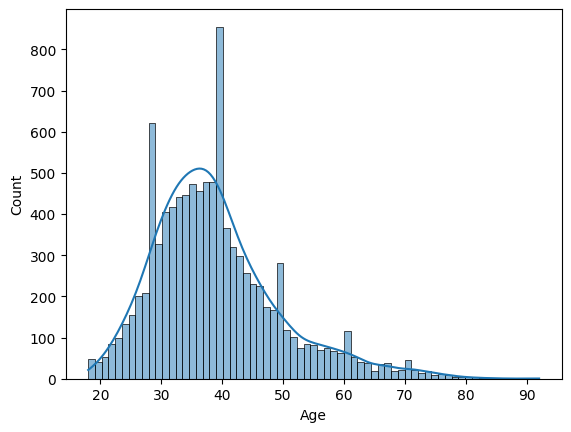

In [68]:
sns.histplot(x = "Age" , data = df , kde  = True)
plt.show()

OBSERVATION :
AS WE CAN CLEARLY SEE FROM THE HISTOGRAM AND THE COUNTPLOT THAT THE AGE OF PEOPLE IS BETWEEN 20 T0 90 YEARS.WE WILL NOT HANDLE THESE OUTLIERS AS THEY ARE TRUE OUTLIERS AND THEY REPRESENT NATURAL VARIATION IN THE DATASET.

#FEATURE ENGINEERING

In [69]:
#CONVERTING CATEGORICAL TO NUMERICAL FEATURE
#LISTING OUT THE CATEGORICAL FEATURES
cat_var = df.select_dtypes(include=['O']).keys()
cat_var

Index(['Geography', 'Gender'], dtype='object')

In [73]:
df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [75]:
#DROPPING THE UNIMORTANT FEATURES
df = df.drop(columns=['Geography_France','Gender_Female'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [81]:
#SPLITTING INTO X MATRIX AND y VECTOR
X = df.drop(columns=['Exited'])
y = df['Exited']

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (8000, 11)
shape of X_test :  (2000, 11)
shape of y_train :  (8000,)
shape of y_test :  (2000,)


In [87]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature


def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr



drop_feature = correlation(X_train , 0.8)
drop_feature


set()

THERE ARE NO FEATURES THAT HAVE SIMILARITY MORE THAN 80%.
IT MEANS ALL OUR INDEPENDENT FEATURES ARE IMPORTANT AND WE DONT NEED TO DELETE ANY COLUMN.

WE WILL BE USING ANN THEREFORE FEATURE SCALING NEEDS TO BE DONE

In [88]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MAKING ARTIFICIAL NEURAL NETWORK

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [90]:
# Initialising the ANN
classifier = Sequential()

In [91]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [92]:
# Adding the input layer and the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [93]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [95]:

#WE WILL BE USING ADAM OPTIMISER
#SINCE IT IS A BINARY CLASSIFICATION THEREFORE WE WILL USE binary crossentrophy AS LOSS FUNCTION
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [102]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [103]:
#TRAINING
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3179 - accuracy: 0.8683 - val_loss: 0.3600 - val_accuracy: 0.8523
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.8679 - val_loss: 0.3597 - val_accuracy: 0.8516
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3178 - accuracy: 0.8688 - val_loss: 0.3600 - val_accuracy: 0.8516
Epoch 4/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3175 - accuracy: 0.8688 - val_loss: 0.3613 - val_accuracy: 0.8493
Epoch 5/100
536/536 [==============================] - 6s 10ms/step - loss: 0.3176 - accuracy: 0.8668 - val_loss: 0.3604 - val_accuracy: 0.8489
Epoch 6/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3173 - accuracy: 0.8707 - val_loss: 0.3593 - val_accuracy: 0.8531
Epoch 7/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3164 - accuracy: 0.8681 - val_loss: 0.3592 - val_accuracy: 0.84

In [107]:
#GETTING TO KNOW ABOUT THE PARAMETERS WE HAVE FOCUSSED ON
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

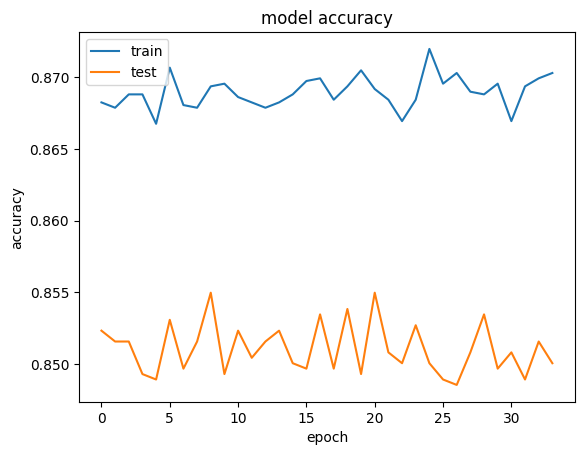

In [108]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

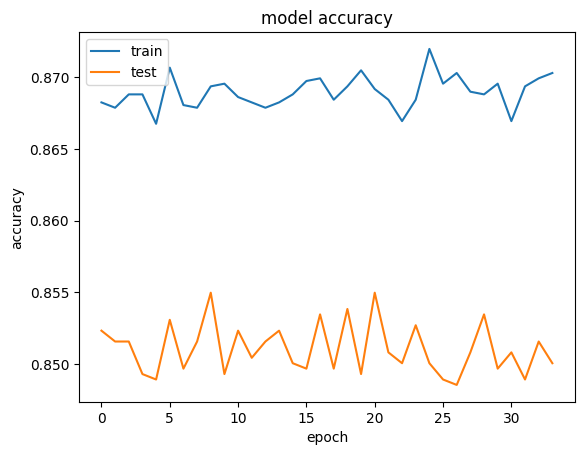

In [109]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [112]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1472,  123],
       [ 185,  220]])

In [113]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [114]:
score

0.846

WE HAVE GOTTEN A DECENT ACCURACY OF 84%